In [4]:
from keras.datasets import mnist
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Input,AveragePooling2D,Reshape,Activation,BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import plot_model, to_categorical
from keras_layer_normalization import LayerNormalization
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#数据变成TensorFow为Backend的形式
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#把标签变成one-hot编码的形式
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [51]:
# 构建vanilla LeNet-5网络
model_vanilla = Sequential()
model_vanilla.add(Conv2D(input_shape = (28,28,1), filters=6, kernel_size=(5,5), padding='valid', activation='tanh'))
model_vanilla.add(MaxPool2D(pool_size=(2,2), strides=2))
model_vanilla.add(Conv2D(input_shape=(14,14,6), filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model_vanilla.add(MaxPool2D(pool_size=(2,2), strides=2))
model_vanilla.add(Flatten())
model_vanilla.add(Dense(120, activation='tanh'))
model_vanilla.add(Dense(84, activation='tanh'))
model_vanilla.add(Dense(10, activation='softmax'))

In [52]:
# 构建LN LeNet-5网络
model_ln = Sequential()
model_ln.add(Conv2D(input_shape = (28,28,1), filters=6, kernel_size=(5,5), padding='valid', activation='tanh'))
model_ln.add(MaxPool2D(pool_size=(2,2), strides=2))
model_ln.add(Conv2D(input_shape=(14,14,6), filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model_ln.add(MaxPool2D(pool_size=(2,2), strides=2))
model_ln.add(Flatten())
model_ln.add(Dense(120, activation='tanh'))
model_ln.add(LayerNormalization())
model_ln.add(Dense(84, activation='tanh'))
model_ln.add(LayerNormalization())
model_ln.add(Dense(10, activation='softmax'))

In [53]:
# 构建BN LeNet-5网络
model_bn = Sequential()
model_bn.add(Conv2D(input_shape = (28,28,1), filters=6, kernel_size=(5,5), padding='valid', activation='tanh'))
model_bn.add(MaxPool2D(pool_size=(2,2), strides=2))
model_bn.add(Conv2D(input_shape=(14,14,6), filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model_bn.add(MaxPool2D(pool_size=(2,2), strides=2))
model_bn.add(Flatten())
model_bn.add(Dense(120, activation='tanh'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(84, activation='tanh'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(10, activation='softmax'))

In [11]:
model_vanilla.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history_vanilla = model_vanilla.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.8379 - acc: 0.7941
Epoch 2/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.3414 - acc: 0.9153
Epoch 3/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.2371 - acc: 0.9393
Epoch 4/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.1889 - acc: 0.9495
Epoch 5/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.1598 - acc: 0.9564
Epoch 6/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.1414 - acc: 0.9607
Epoch 7/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.1279 - acc: 0.9645
Epoch 8/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.1174 - acc: 0.9667
Epoch 9/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.1098 - acc: 0.9685
Epoch 10/10
60000/60000 [==============================] - 12s 205us/step - loss: 

In [27]:
model_bn.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history_bn = model_bn.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.4860 - acc: 0.8567
Epoch 2/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.2057 - acc: 0.9409
Epoch 3/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.1583 - acc: 0.9534
Epoch 4/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.1351 - acc: 0.9609
Epoch 5/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.1210 - acc: 0.9637
Epoch 6/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.1067 - acc: 0.9679
Epoch 7/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0984 - acc: 0.9705
Epoch 8/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0915 - acc: 0.9728
Epoch 9/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0863 - acc: 0.9741
Epoch 10/10
60000/60000 [==============================] - 14s 235us/step - loss: 

In [29]:
model_ln.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history_ln = model_ln.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.5927 - acc: 0.8251
Epoch 2/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2262 - acc: 0.9329
Epoch 3/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.1765 - acc: 0.9468
Epoch 4/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.1501 - acc: 0.9544
Epoch 5/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.1365 - acc: 0.9580
Epoch 6/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.1227 - acc: 0.9629
Epoch 7/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1147 - acc: 0.9647
Epoch 8/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.1082 - acc: 0.9669
Epoch 9/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0999 - acc: 0.9695
Epoch 10/10
60000/60000 [==============================] - 16s 269us/step - loss: 

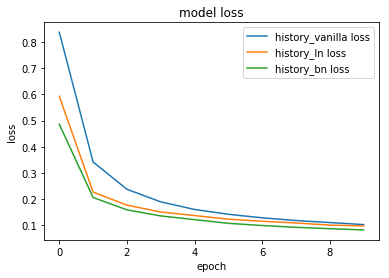

In [32]:
# summarize history for accuracy
plt.plot(history_vanilla.history['loss'])
plt.plot(history_ln.history['loss'])
plt.plot(history_bn.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['history_vanilla loss','history_ln loss','history_bn loss'], loc='upper right')
plt.show()

In [55]:
model_vanilla.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history_vanilla = model_vanilla.fit(x_train, y_train, batch_size=8, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 43s 713us/step - loss: 0.2366 - acc: 0.9330
Epoch 2/5
60000/60000 [==============================] - 40s 666us/step - loss: 0.0973 - acc: 0.9703
Epoch 3/5
60000/60000 [==============================] - 40s 675us/step - loss: 0.0803 - acc: 0.9747
Epoch 4/5
60000/60000 [==============================] - 41s 688us/step - loss: 0.0608 - acc: 0.9817
Epoch 5/5
60000/60000 [==============================] - 41s 677us/step - loss: 0.0540 - acc: 0.9836


In [54]:
model_bn.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history_bn = model_bn.fit(x_train, y_train, batch_size=8, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 49s 808us/step - loss: 0.3450 - acc: 0.8919
Epoch 2/5
60000/60000 [==============================] - 47s 780us/step - loss: 0.2136 - acc: 0.9349
Epoch 3/5
60000/60000 [==============================] - 47s 780us/step - loss: 0.1752 - acc: 0.9469
Epoch 4/5
60000/60000 [==============================] - 46s 772us/step - loss: 0.1420 - acc: 0.9570
Epoch 5/5
60000/60000 [==============================] - 46s 764us/step - loss: 0.1222 - acc: 0.9631


In [56]:
model_ln.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history_ln = model_ln.fit(x_train, y_train, batch_size=8, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 47s 784us/step - loss: 0.2278 - acc: 0.9280
Epoch 2/5
60000/60000 [==============================] - 45s 758us/step - loss: 0.0959 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 47s 780us/step - loss: 0.0768 - acc: 0.9763
Epoch 4/5
60000/60000 [==============================] - 45s 747us/step - loss: 0.0592 - acc: 0.9817
Epoch 5/5
60000/60000 [==============================] - 47s 782us/step - loss: 0.0491 - acc: 0.9848


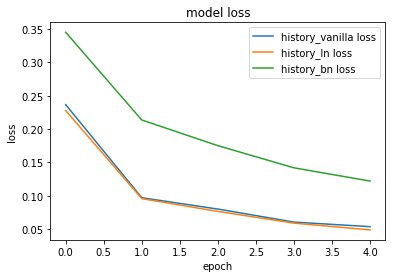

In [57]:
# summarize history for accuracy
plt.plot(history_vanilla.history['loss'])
plt.plot(history_ln.history['loss'])
plt.plot(history_bn.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['history_vanilla loss','history_ln loss','history_bn loss'], loc='upper right')
plt.show()